In [19]:
import pandas as pd
import numpy as np
import math
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

# Test 1 Доверительные интервалы для среднего

In [17]:
data=pd.read_csv('water.txt',sep='\t')
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [56]:
def get_t(data,param):
    mean = data.mean()
    mean_std = data.std(ddof=1)/np.sqrt(len(data))
    return _tconfint_generic(mean[param], mean_std[param],len(data) - 1, 0.05,'two-sided')

task2_t=get_t(data,'mortality')
print ('task2_t=',task2_t)
print ("Task2=",round(task2_t[0],4))

## Task2= 1476.0833

In [67]:
task3_t=get_t(data[data.location=='South'],'mortality')
print ('task3_t=',task3_t)
print ("Task3=",round(task3_t[1],4))


task3_t= (1320.1517462936238, 1433.463638321761)
Task3= 1433.4636


## Task3= 1433.4636

In [61]:
task4_t=get_t(data[data.location=='North'],'mortality')
print ('task4_t=',task4_t)

task4_t= (1586.5605251961385, 1680.6394748038613)


## Task 4 = Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная

In [62]:
task5_t1=get_t(data[data.location=='South'],'hardness')
task5_t2=get_t(data[data.location=='North'],'hardness')
print ('task5_t1=',task5_t1)
print ('task5_t2=',task5_t2)

task5_t1= (53.467198692036106, 86.071262846425441)
task5_t2= (21.422487285724259, 39.377512714275738)


## Task 5 = Не пересекаются

In [66]:
z=1.95996
sigma=1
acc=0.1
n=(z*sigma/acc)**2
n

384.14432015999995

## Task6=385

# Test 2 = Доверительные интервалы для долей

In [68]:
from statsmodels.stats.proportion import proportion_confint

In [116]:
n=50
suc=1
normal_interval = proportion_confint(suc, n, method = 'normal')
print( 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))
print (round(normal_interval[0],4))

normal_interval [-0.018805, 0.058805] with width 0.077611
-0.0188


## Task 2 = -0.0188

In [83]:
wilson_interval = proportion_confint(suc, n, method = 'wilson')
print (wilson_interval)
print (round(wilson_interval[0],4))

(0.0035392592716462362, 0.10495443589637815)
0.0035


## Task 3 = 0.0035

## Task 4=  Уилсон

In [102]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from  matplotlib import pyplot as plt

In [118]:
w=0.01
p=suc/n
n_samples = int(np.ceil(samplesize_confint_proportion(suc/n, w)))
n_samples

753

##### Task 5= 753

In [121]:
p=np.linspace(0,1,num=100)
n_p=samplesize_confint_proportion(p, w/2)

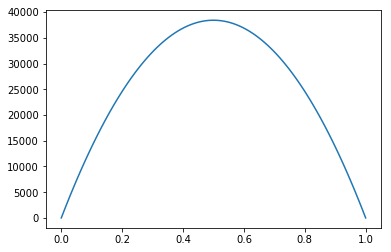

In [122]:
plt.plot(p,n_p)
plt.show()

In [123]:
n_p.max()


38410.668750946272

In [124]:
int(np.ceil(samplesize_confint_proportion(0.5, w)))

9604

## Task 6 =9604